# Pokemon Stats Analysis 

In this notebook I will work with a database containing stats and other useful data, like types and legendary status, of 721 Pokemon. My goal will be to explore the information of all Pokemon and find trends, in order to finally get a list of the top 10 best non-legendary Pokemon and the top 5 legendary Pokemon.

### Importing the data

In [1]:
# We import all the necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# We set the style of the Seaborn graphs.
sns.set_style('darkgrid')

# We read the flat file containing the data and create a dataframe based on it.
pokemon = pd.read_csv('Pokemon.csv')

# We print the head of the dataframe to verify that the data was imported properly.
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [2]:
# The data was imported correctly, so let's get a sample of 10 Pokemon from the dataset to see what information is available.
pokemon.sample(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
86,80,Slowbro,Water,Psychic,490,95,75,110,100,80,30,1,False
21,17,Pidgeotto,Normal,Flying,349,63,60,55,50,50,71,1,False
54,49,Venomoth,Bug,Poison,450,70,65,60,90,75,90,1,False
777,707,Klefki,Steel,Fairy,470,57,80,91,80,87,75,6,False
259,240,Magby,Fire,NaN,365,45,75,37,70,55,83,2,False
366,334,AltariaMega Altaria,Dragon,Fairy,590,75,110,110,110,105,80,3,False
93,86,Seel,Water,NaN,325,65,45,55,45,70,45,1,False
191,177,Natu,Psychic,Flying,320,40,50,45,70,45,70,2,False
347,318,Carvanha,Water,Dark,305,45,90,20,65,20,65,3,False
540,483,Dialga,Steel,Dragon,680,100,120,120,150,100,90,4,True


### Exploratory Data Analysis

In [3]:
# Let's get some general info of the data frame.
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


There are 800 unique entries or Pokemon, with 13 variables categorizing them. We got the Name of the Pokemon, its primary and secondary type when it applies, the combat stats of the Pokemon (Total Stats, HP, Attack, Defense, Special Attack, Special Defense, and Speed), what generation it is from and whether it is legendary or not.

In [4]:
# There doesn't seem to be any missing values, but let's change the nulls from the Type 2 column into "None".
pokemon['Type 2'].fillna('None', inplace=True)
# Let's verify that the change was applied.
pokemon['Type 2'].isnull().sum()

0

In [5]:
# Descriptive statistic summary of the stats of the Pokemon.
pokemon.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


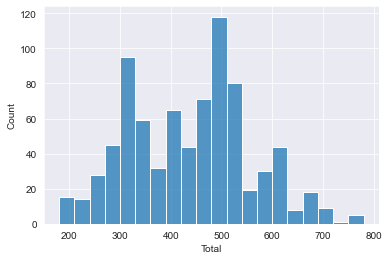

In [6]:
# Let's visualize the distribution of the data.
sns.histplot(pokemon['Total'],bins = 20)
plt.show()

Most Pokemon have a stat Total of about 490-500.

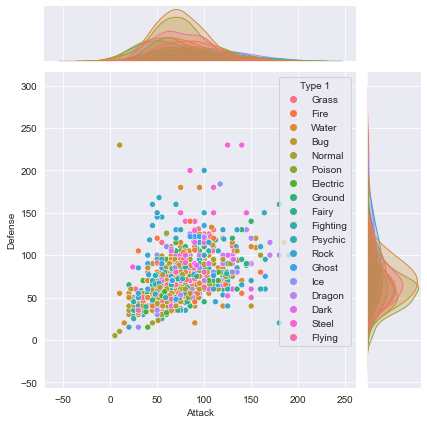

In [7]:
sns.jointplot(data=pokemon, x='Attack', y='Defense',hue='Type 1')
plt.show()

Most Pokemon have an Attack of about 60 to 70, while most Pokemon have a Defense of around 55 to 65.
Looking at the data, it would seem that Normal and Bug Pokemon are often the worst performing in these two attributes, while Dragon, Rock, Ghost and Steel seem to be especially strong.

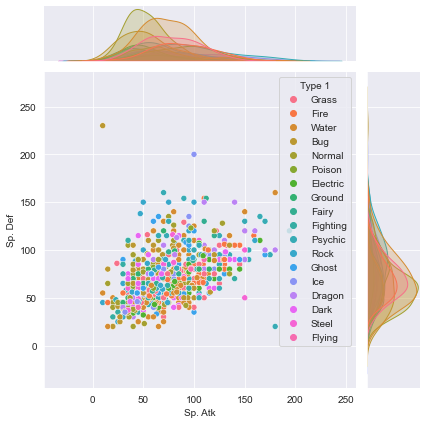

In [8]:
sns.jointplot(data=pokemon, x='Sp. Atk', y='Sp. Def', hue='Type 1')
plt.show()

Special Attack seems to vary a lot from type to type, with a lot of Normal Pokemon having Sp. Atk below 50, Water Pokemon being evenly distributed from about 55 to 85 Sp. Atk. Special Defense is less diverse, with most Pokemon having this stat at about 60 to 70. Once again, Normal and Bug Pokemon seem to be very weak in these attributes, and there seem to be less strong outliers in the data.